### Самостоятельная работа 6

### Задание
Вам дано две таблицы: первая, маршрут пушешественника [route.csv](https://pythonmiigaik.github.io/Lesson%206/route.csv), где с перерывом в 20 мин турист отмечал свои координаты на карте. Координаты указаны в километрах, относительно Москвы, то есть Москва имеет координаты (0,0). Вторая таблица [cities.csv](https://pythonmiigaik.github.io/Lesson%206/cities.csv) - координаты городов в той окрестности, где ездил путешественник.

1. Как долго ездил путешественник? <br>
2. Посмотрите как менялась скорость в течении его поездки (постройтке график)<br>
3. Найдите среднюю скорость, изобразите на том же графике в виде горизонтальной линии.<br>
4. Найдите среднюю скорость без учета остановок, изобразите на том же графике в виде горизонтальной линии.<br>
5. Добавьте легенду (скорость, средняя скорость, средняя без остановок).<br>
6. Изобразите маршрут на графике.<br>
7. Добавьте к графику города.<br>
8. Найдите самую продолжительную остановку, в каком городе она была?<br>
9. Постройте piechart продолжительности остановок.


**Подсказки:**
1. pd.read_csv имеет атрибут header=None
2. plt.text(x, y, text)

3. PieChart:<br>
plt.pie([10, 4, 25, 6], labels=['a', 'b', 'c', 'd'], autopct='%1.1f%%');<br>
plt.axis('equal')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('route.csv', sep=' ')
df.head()

,x,y
0,-45.525396,-77.101920
1,-41.046936,-82.523700
2,-26.098632,-98.327544
3,-19.713288,-104.672148
4,-14.434056,-109.632516


In [3]:
towns = pd.read_csv('cities.csv', sep=';', header=None)
towns.columns = ['town', 'x', 'y']
towns.head()

,town,x,y
0,Тверь,43.742328,65.180052
1,Москва,-45.525396,-77.101920
2,Пушкино,-29.199072,-96.597228
3,Сергиев Посад,-3.324552,-118.745676
4,Владимир,-17.551128,-310.010820


### Скорость

In [4]:
v = [0]
for i in range(1, df.shape[0]):
    v.append(np.sqrt(sum(((df.iloc[i]-df.iloc[i-1])*(df.iloc[i]-df.iloc[i-1]))))*3)
df['v'] = v
df.head()

,x,y,v
0,-45.525396,-77.101920,0.000000
1,-41.046936,-82.523700,21.096699
2,-26.098632,-98.327544,65.260398
3,-19.713288,-104.672148,27.004436
4,-14.434056,-109.632516,21.732001


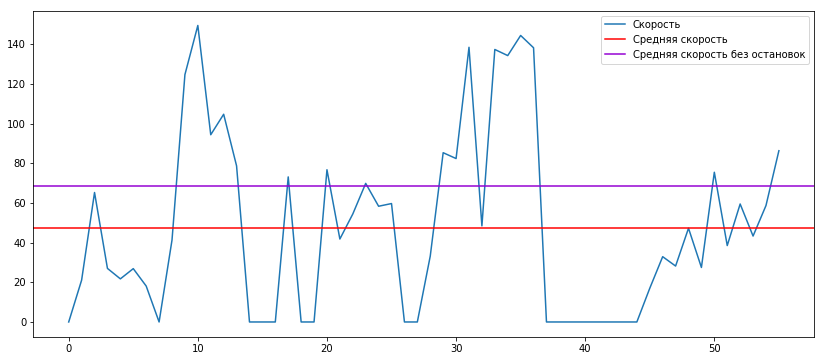

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df['v'], label = 'Скорость')
plt.axhline((df['v']).mean(), c='red', label = 'Средняя скорость');
plt.axhline(df[df.v != 0].v.mean() , c='darkviolet', label = 'Средняя скорость без остановок')
plt.legend(loc=1);

In [6]:
df['status'] = df.v==0
df.head()

,x,y,v,status
0,-45.525396,-77.101920,0.000000,True
1,-41.046936,-82.523700,21.096699,False
2,-26.098632,-98.327544,65.260398,False
3,-19.713288,-104.672148,27.004436,False
4,-14.434056,-109.632516,21.732001,False


### Маршрут

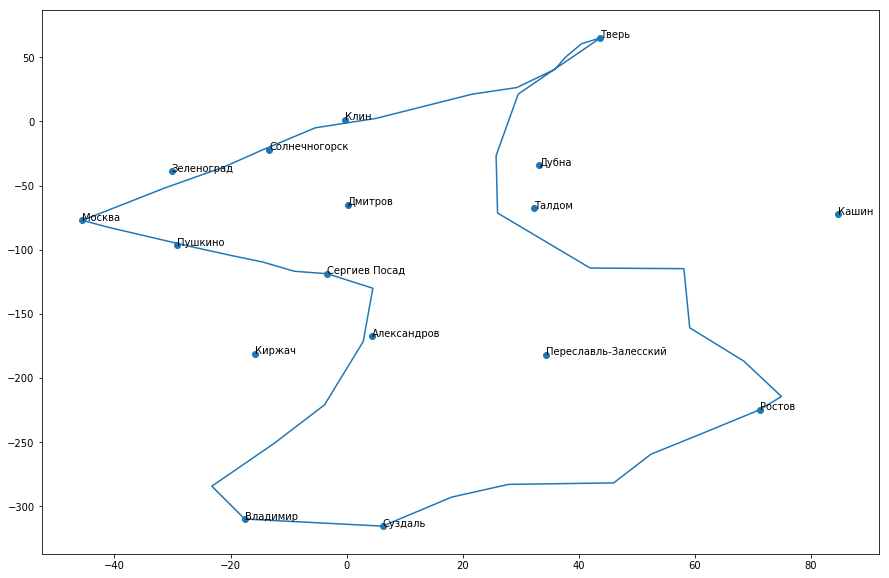

In [7]:
plt.figure(figsize=(15,10), facecolor='white')
plt.plot(df.x, df.y);
for (text, x, y), in zip(towns.values):
#     print(x, y, text)
    plt.text(x, y, text);
plt.scatter(towns.x, towns.y);

### Вычисляем остановки

In [8]:
pauses = {}
val = 0
key = None
for i in range(df.shape[0]):
    if df.loc[i].status:
        if val == 0:
            key = tuple(df.loc[i][['x', 'y']])
        val += 1
    else: 
        if val != 0:
            pauses[key] = val*20
        val = 0

In [9]:
pauses

{(-45.52539600000014, -77.10192000000032): 20,
 (-17.551128000000034, -310.01082000000036): 60,
 (-3.3245519999998976, -118.74567600000029): 20,
 (6.185340000000252, -315.5479320000001): 40,
 (43.742327999999866, 65.1800519999995): 160,
 (71.14984800000022, -224.85909599999974): 40}

In [10]:
for i in towns:
    print(i)

town
x
y


In [11]:
towns_dict = {tuple(towns.loc[i][['x', 'y']]): towns.loc[i]['town'] for i in range(towns.shape[0])}
towns_dict

{(-45.52539600000014, -77.10192000000032): 'Москва',
 (-30.13063199999973, -38.723664000000134): 'Зеленоград',
 (-29.19907200000009, -96.5972280000003): 'Пушкино',
 (-17.551128000000034, -310.01082000000036): 'Владимир',
 (-15.805691999999652, -180.9906000000003): 'Киржач',
 (-13.36717200000035, -21.8815799999999): 'Солнечногорск',
 (-3.3245519999998976, -118.74567600000029): 'Сергиев Посад',
 (-0.2753520000001401, 1.1896920000002922): 'Клин',
 (0.23696399999977305, -65.02490400000028): 'Дмитров',
 (4.338600000000183, -167.6092320000006): 'Александров',
 (6.185340000000252, -315.5479320000001): 'Суздаль',
 (32.22038400000042, -67.56279599999996): 'Талдом',
 (33.212087999999824, -34.3401240000006): 'Дубна',
 (34.35255600000025, -181.76566799999995): 'Переславль-Залесский',
 (43.742327999999866, 65.1800519999995): 'Тверь',
 (71.14984800000022, -224.85909599999974): 'Ростов',
 (84.62302799999972, -72.4077480000002): 'Кашин'}

In [12]:
pauses_towns = {towns_dict[key]:val for key,val in pauses.items()}
pauses_towns

{'Владимир': 60,
 'Москва': 20,
 'Ростов': 40,
 'Сергиев Посад': 20,
 'Суздаль': 40,
 'Тверь': 160}

Text(0.5,1,'ЕУЧЕ')

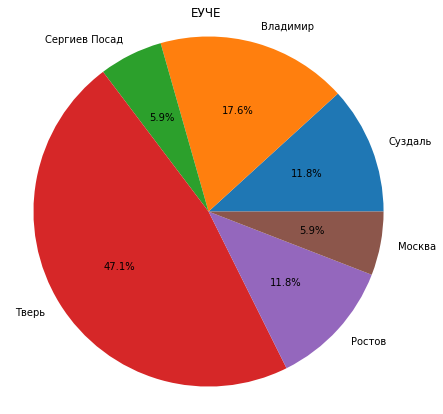

In [15]:
plt.figure(figsize=(7,7))
plt.pie(pauses_towns.values(), labels=pauses_towns.keys(), 
        autopct='%1.1f%%');
plt.axis('equal');

In [14]:
max(pauses_towns, key=pauses_towns.get)
max_key, max_val = list(pauses_towns.items())[0]
for key, val in pauses_towns.items():
    if val > max_val:
        max_key = key
        max_val = val
max_key

'Тверь'